In [159]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


# Load data
df = pd.read_csv('marketing_campaign.csv', sep='\t')
print("Number of datapoints:", len(df))

# Handle missing values, if any
df = df.dropna()



Number of datapoints: 2240


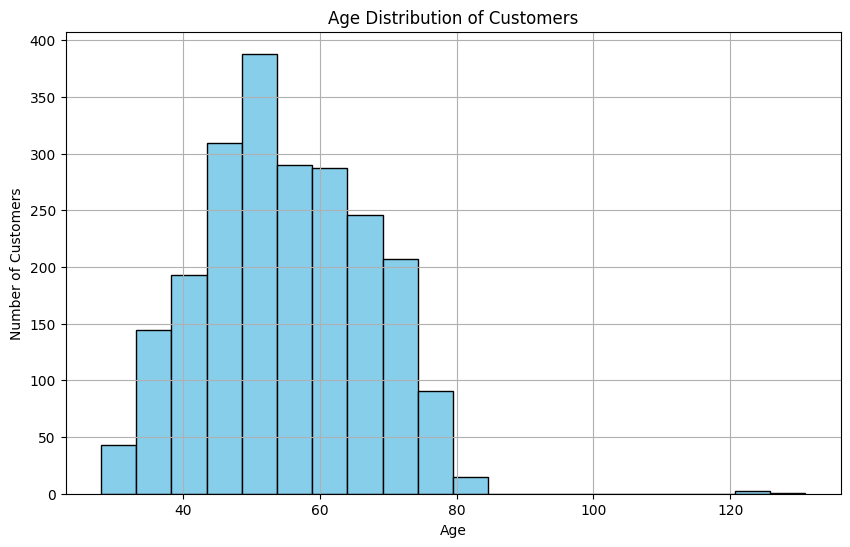

In [160]:
from datetime import datetime
import matplotlib.pyplot as plt

df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')

current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth'].dt.year

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

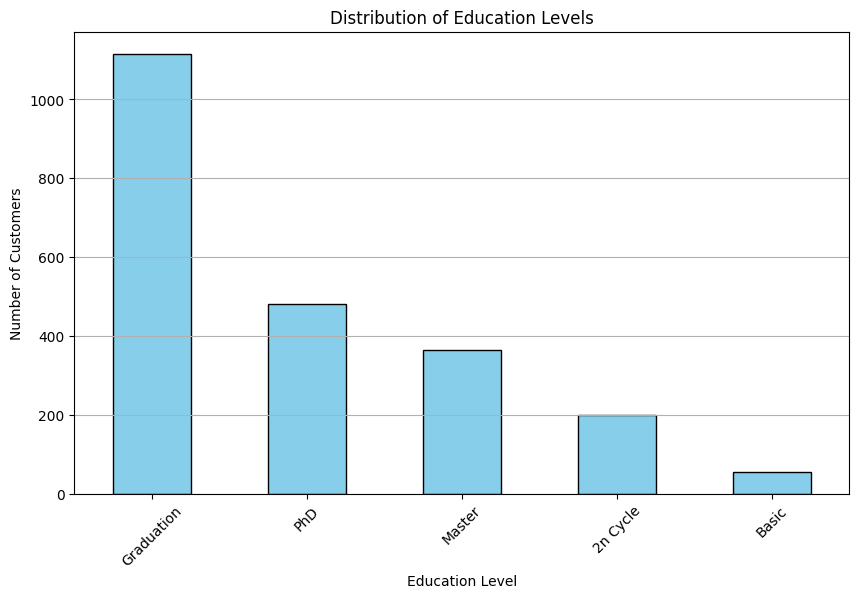

In [161]:
education_counts = df['Education'].value_counts()


plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [162]:
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')

current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth'].dt.year

first_set_columns = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 
                     'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                     'MntSweetProducts', 'MntGoldProds']

first_set_corr_matrix = df[first_set_columns].corr()

print("Correlation Matrix for the first set:")
print(first_set_corr_matrix)

Correlation Matrix for the first set:
                  Age  Income  Kidhome  Teenhome  Recency  Complain  MntWines  \
Age                 1       0       -0         0        0         0         0   
Income              0       1       -0         0       -0        -0         1   
Kidhome            -0      -0        1        -0        0         0        -0   
Teenhome            0       0       -0         1        0         0         0   
Recency             0      -0        0         0        1         0         0   
Complain            0      -0        0         0        0         1        -0   
MntWines            0       1       -0         0        0        -0         1   
MntFruits           0       0       -0        -0       -0        -0         0   
MntMeatProducts     0       1       -0        -0        0        -0         1   
MntFishProducts     0       0       -0        -0        0        -0         0   
MntSweetProducts    0       0       -0        -0        0        -0    

In [163]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

product_corr_matrix = df[product_columns].corr()

print("Correlation Matrix for spending on products:")
print(product_corr_matrix)

Correlation Matrix for spending on products:
                  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
MntWines                 1          0                1                0   
MntFruits                0          1                1                1   
MntMeatProducts          1          1                1                1   
MntFishProducts          0          1                1                1   
MntSweetProducts         0          1                1                1   
MntGoldProds             0          0                0                0   

                  MntSweetProducts  MntGoldProds  
MntWines                         0             0  
MntFruits                        1             0  
MntMeatProducts                  1             0  
MntFishProducts                  1             0  
MntSweetProducts                 1             0  
MntGoldProds                     0             1  


In [164]:
purchase_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

purchase_corr_matrix = df[purchase_columns].corr()

print("Correlation Matrix for purchasing behavior:")
print(purchase_corr_matrix)

Correlation Matrix for purchasing behavior:
                     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
NumWebPurchases                    1                    0                  1   
NumCatalogPurchases                0                    1                  1   
NumStorePurchases                  1                    1                  1   
NumWebVisitsMonth                 -0                   -1                 -0   

                     NumWebVisitsMonth  
NumWebPurchases                     -0  
NumCatalogPurchases                 -1  
NumStorePurchases                   -0  
NumWebVisitsMonth                    1  


In [165]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Year_Customer'] = df['Dt_Customer'].dt.year

numeric_cols = ['Year_Customer','Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
categorical_cols = ['Education', 'Marital_Status']

# Define preprocessing steps for numerical and categorical columns
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply preprocessing steps to all columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit and transform the data with the preprocessor
df_preprocessed = preprocessor.fit_transform(df)
print(df_preprocessed)

[[2.0120e+03 6.7000e+01 5.8138e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0140e+03 7.0000e+01 4.6344e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0130e+03 5.9000e+01 7.1613e+04 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [2.0140e+03 4.3000e+01 5.6981e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0140e+03 6.8000e+01 6.9245e+04 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [2.0120e+03 7.0000e+01 5.2869e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


30


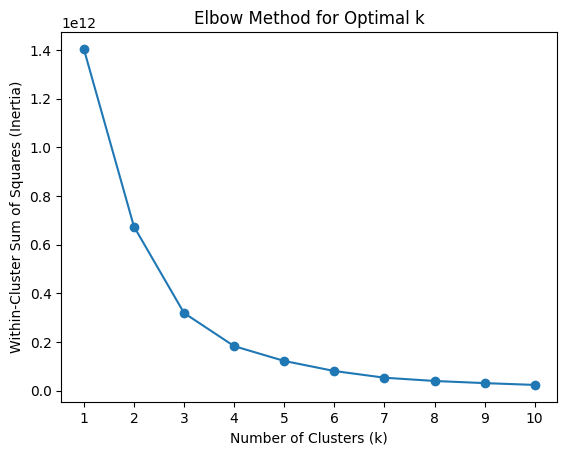

In [166]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Apply PCA to the dense matrix
n_components = 3  # Set the number of components as needed
X_dense = df_preprocessed
print(len(df_preprocessed[0]))

# Apply PCA to the dense matrix
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_dense)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


k_values = range(1, 11) 

inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)


plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.xticks(k_values)

plt.savefig('PCA_k.png')
plt.show()


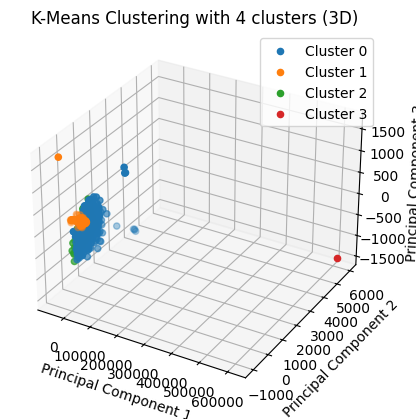

In [167]:
from mpl_toolkits.mplot3d import Axes3D

# Apply K-Means Clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)
optimal_k = 4
# Visualize Clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_label in range(optimal_k):
    cluster_points = X_pca[clusters == cluster_label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster_label}')

ax.set_title(f'K-Means Clustering with {optimal_k} clusters (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.savefig('PCA.png')
plt.show()

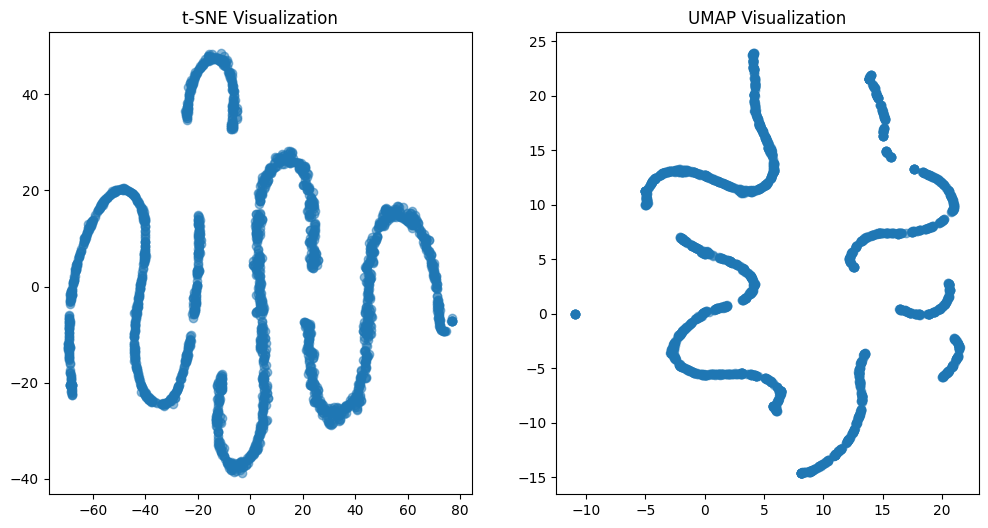

In [168]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap

# Assuming df_preprocessed is the output from your preprocessor and is a NumPy array
# You might need to convert it from a sparse matrix to a dense one if necessary
if hasattr(df_preprocessed, "toarray"):
    data = df_preprocessed.toarray()
else:
    data = df_preprocessed

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data)

# UMAP
umap_reducer = umap.UMAP()
umap_results = umap_reducer.fit_transform(data)

# Plotting t-SNE
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.title('t-SNE Visualization')

# Plotting UMAP
plt.subplot(122)
plt.scatter(umap_results[:, 0], umap_results[:, 1], alpha=0.5)
plt.title('UMAP Visualization')



plt.savefig('t-sne_umap.png')
plt.show()

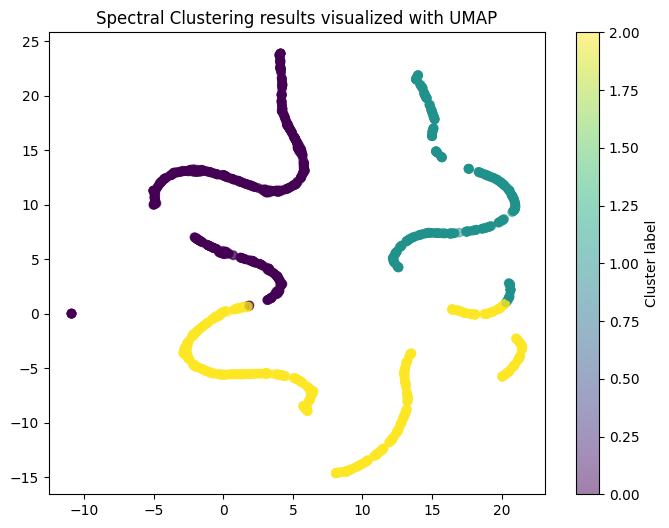

In [169]:
from sklearn.cluster import SpectralClustering
import numpy as np

# Assuming 'data' is your preprocessed dataset from earlier steps
# Determine the number of clusters, here as an example we use 3
n_clusters = 3

# Apply spectral clustering
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
clusters = spectral.fit_predict(data)

# We'll use UMAP results for visualization
if 'umap_results' not in locals():  # Check if umap_results is not already computed
    umap_reducer = umap.UMAP()
    umap_results = umap_reducer.fit_transform(data)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Spectral Clustering results visualized with UMAP')
plt.colorbar(label='Cluster label')


plt.savefig('umap.png')
plt.show()

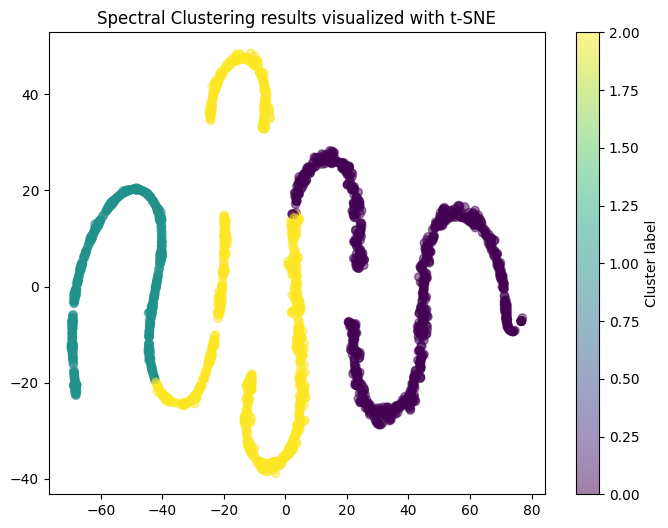

In [170]:
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
clusters = spectral.fit_predict(data)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Spectral Clustering results visualized with t-SNE')
plt.colorbar(label='Cluster label')


plt.savefig('tsne.png')
plt.show()

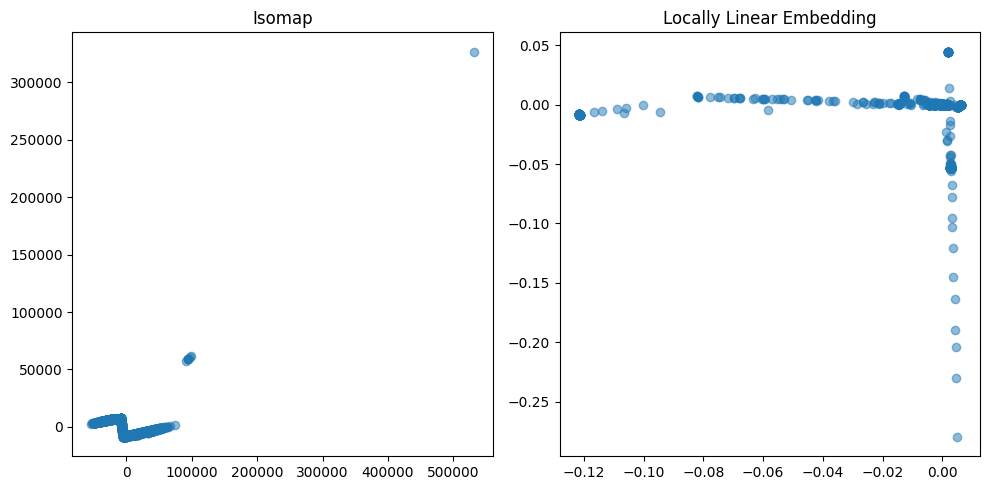

In [171]:
from sklearn.manifold import Isomap, LocallyLinearEmbedding

# Apply Isomap
isomap = Isomap(n_components=2)
isomap_results = isomap.fit_transform(df_preprocessed)

# Apply LLE
lle = LocallyLinearEmbedding(n_components=2)
lle_results = lle.fit_transform(df_preprocessed)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(isomap_results[:, 0], isomap_results[:, 1], alpha=0.5)
plt.title('Isomap')

# Plot LLE results
plt.subplot(1, 2, 2)
plt.scatter(lle_results[:, 0], lle_results[:, 1], alpha=0.5)
plt.title('Locally Linear Embedding')

plt.tight_layout()
plt.savefig('iso_and_lle.png')
plt.show()


Number of clusters: 3
Number of noise points: 0


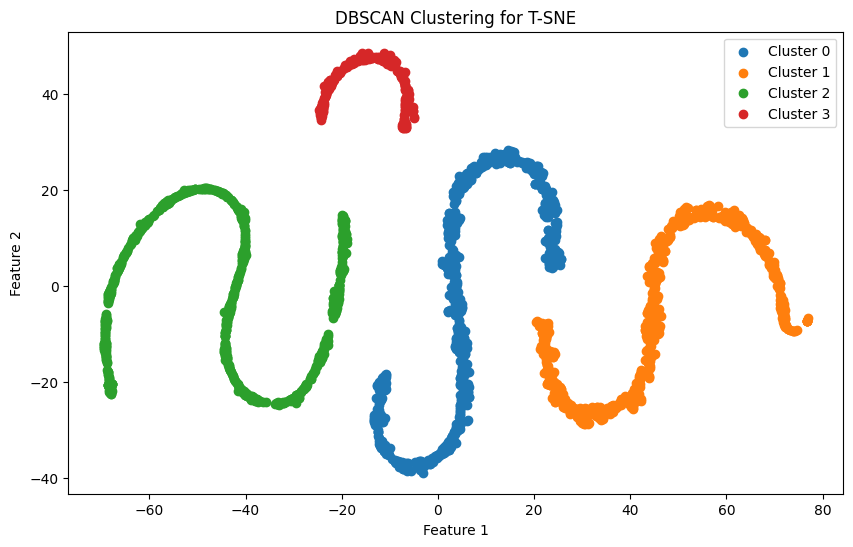

In [172]:
from sklearn.cluster import DBSCAN
eps = 5  # Adjust this value as needed

# Initialize and fit DBSCAN clustering model
dbscan = DBSCAN(eps=eps, min_samples=2)  # min_samples is the minimum number of samples in a neighborhood for a point to be considered as a core point
labels = dbscan.fit_predict(tsne_results)

# Get the unique cluster labels
unique_labels = np.unique(labels)

# Print the number of clusters and noise points
num_clusters = len(unique_labels) - 1  # Exclude noise points (-1 for the noise label)
num_noise_points = np.sum(labels == -1)  # Count points labeled as noise (-1)
print(f"Number of clusters: {num_clusters}")
print(f"Number of noise points: {num_noise_points}")

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_label in unique_labels:
    if cluster_label == -1:
        # Plot noise points in black
        plt.scatter(tsne_results[labels == cluster_label][:, 0], tsne_results[labels == cluster_label][:, 1], c='black', label='Noise')
    else:
        # Plot points belonging to each cluster with different colors
        plt.scatter(tsne_results[labels == cluster_label][:, 0], tsne_results[labels == cluster_label][:, 1], label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering for T-SNE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.savefig('DBSCAN_tsne')
plt.show()


Number of clusters: 7
Number of noise points: 0


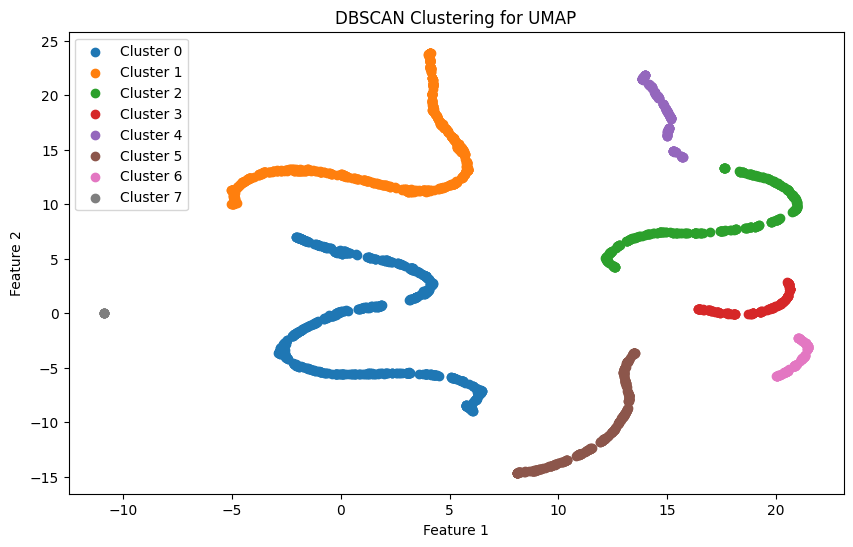

In [173]:
eps = 2  # Adjust this value as needed

# Initialize and fit DBSCAN clustering model
dbscan = DBSCAN(eps=eps, min_samples=2)  # min_samples is the minimum number of samples in a neighborhood for a point to be considered as a core point
labels = dbscan.fit_predict(umap_results)

# Get the unique cluster labels
unique_labels = np.unique(labels)

# Print the number of clusters and noise points
num_clusters = len(unique_labels) - 1  # Exclude noise points (-1 for the noise label)
num_noise_points = np.sum(labels == -1)  # Count points labeled as noise (-1)
print(f"Number of clusters: {num_clusters}")
print(f"Number of noise points: {num_noise_points}")

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_label in unique_labels:
    if cluster_label == -1:
        # Plot noise points in black
        plt.scatter(umap_results[labels == cluster_label][:, 0], umap_results[labels == cluster_label][:, 1], c='black', label='Noise')
    else:
        # Plot points belonging to each cluster with different colors
        plt.scatter(umap_results[labels == cluster_label][:, 0], umap_results[labels == cluster_label][:, 1], label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering for UMAP')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.savefig('DBSCAN_umap')
plt.show()

In [174]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('marketing_campaign.csv',header=0,sep='\t')

In [175]:
from datetime import datetime
data['Year_Birth'] = pd.to_datetime(data['Year_Birth'], format='%Y')

current_year = datetime.now().year
data['Age'] = current_year - data['Year_Birth'].dt.year

data['Spending']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
#Seniority variable creation
last_date = date(2024,5, 1)
data['Seniority']=pd.to_datetime(data['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')
data['Seniority'] = pd.to_numeric(data['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30


from sklearn.cluster import DBSCAN
eps = 5  # Adjust this value as needed

# Initialize and fit DBSCAN clustering model
dbscan = DBSCAN(eps=eps, min_samples=2)  # min_samples is the minimum number of samples in a neighborhood for a point to be considered as a core point
labels = dbscan.fit_predict(tsne_results)

print(len(data))
data=data.dropna().reset_index(drop=True)
original_indices = data.index  # Store the original indices to filter tsne_results

# Further filter by Income
data = data[data['Income'] < 600000]
filtered_indices = data.index  # Store the indices after all filtering

labels_filtered = labels[original_indices]
labels_filtered = labels_filtered[filtered_indices]

data2 = data.copy()

2240


In [176]:
scaler=StandardScaler()
dataset_temp=data[['Income','Seniority','Spending']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')

gmm=GaussianMixture(n_components=4, covariance_type='spherical',max_iter=2000, random_state=5).fit(X)
labels = gmm.predict(X)
dataset_temp['Cluster'] = labels
dataset_temp=dataset_temp.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
data = data.merge(dataset_temp.Cluster, left_index=True, right_index=True)

pd.options.display.float_format = "{:.0f}".format
summary=data[['Income','Spending','Seniority','Cluster']]
summary.set_index("Cluster", inplace = True)
summary=summary.groupby('Cluster').describe().transpose()
summary.head()

Cluster       High potential  Leaky bucket  Need attention  Stars
Income count             462           641             528    584
       mean            73438         37705           69542  34757
       std             13753         12397           12006  12075
       min             49090          1730           44802   2447
       25%             65298         28839           60880  26489

In [177]:

PLOT = go.Figure()
for C in list(data.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data.Cluster == C]['Income'],
                                y = data[data.Cluster == C]['Seniority'],
                                z = data[data.Cluster == C]['Spending'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Seniority', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spending', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [178]:
data = data2
scaler=StandardScaler()
dataset_temp=data[['Income','Seniority','Spending']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')


dataset_temp['Cluster'] = labels_filtered
dataset_temp=dataset_temp.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
data = data.merge(dataset_temp.Cluster, left_index=True, right_index=True)

pd.options.display.float_format = "{:.0f}".format
summary=data[['Income','Spending','Seniority','Cluster']]
summary.set_index("Cluster", inplace = True)
summary=summary.groupby('Cluster').describe().transpose()
summary.head()

Cluster       High potential  Leaky bucket  Need attention  Stars
Income count             711           201             627    676
       mean            27862         42353           78078  55969
       std              8258          1693           11423   6117
       min              1730         39356           66294  45503
       25%             22536         40851           70924  50615

In [179]:
PLOT = go.Figure()
for C in list(data.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data.Cluster == C]['Income'],
                                y = data[data.Cluster == C]['Seniority'],
                                z = data[data.Cluster == C]['Spending'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Seniority', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spending', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [180]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df_preprocessed = preprocessor.fit_transform(df)

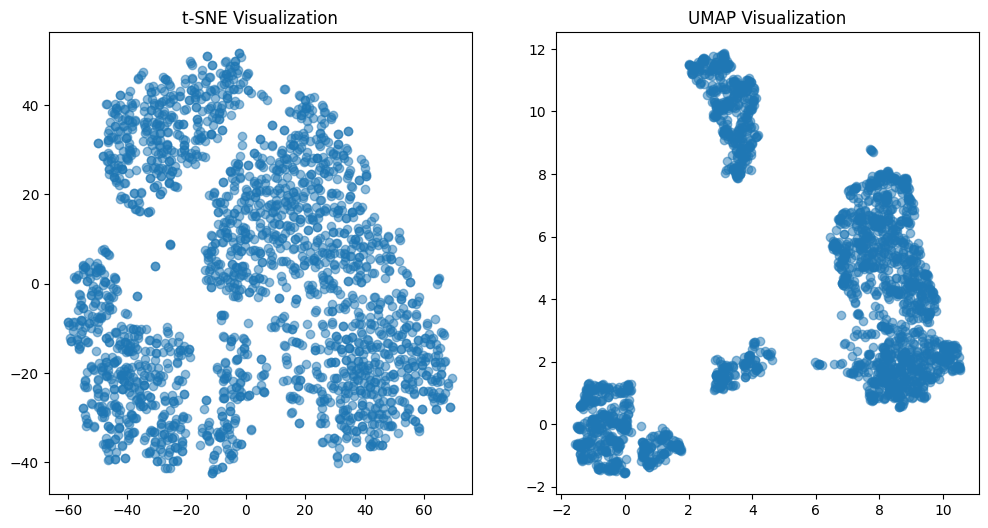

In [181]:
if hasattr(df_preprocessed, "toarray"):
    data = df_preprocessed.toarray()
else:
    data = df_preprocessed

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data)

# UMAP
umap_reducer = umap.UMAP()
umap_results = umap_reducer.fit_transform(data)

# Plotting t-SNE
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.title('t-SNE Visualization')

# Plotting UMAP
plt.subplot(122)
plt.scatter(umap_results[:, 0], umap_results[:, 1], alpha=0.5)
plt.title('UMAP Visualization')



plt.savefig('t-sne_umap.png')
plt.show()

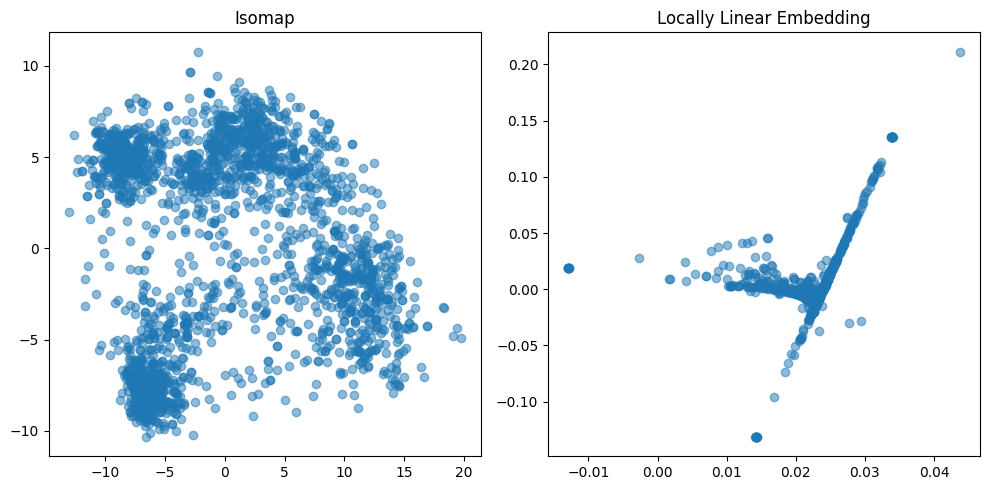

In [182]:
isomap = Isomap(n_components=2)
isomap_results = isomap.fit_transform(df_preprocessed)

# Apply LLE
lle = LocallyLinearEmbedding(n_components=2)
lle_results = lle.fit_transform(df_preprocessed)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(isomap_results[:, 0], isomap_results[:, 1], alpha=0.5)
plt.title('Isomap')

# Plot LLE results
plt.subplot(1, 2, 2)
plt.scatter(lle_results[:, 0], lle_results[:, 1], alpha=0.5)
plt.title('Locally Linear Embedding')

plt.tight_layout()
plt.savefig('iso_and_lle.png')
plt.show()

In [183]:
from sklearn.cluster import KMeans
n_clusters = 4

# Initialize KMeans with the desired number of clusters
kmeans_tsne = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_umap = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_isomap = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_lle = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans to the t-SNE and UMAP results
tsne_labels = kmeans_tsne.fit_predict(tsne_results)
umap_labels = kmeans_umap.fit_predict(umap_results)
isomap_labels = kmeans_tsne.fit_predict(isomap_results)
lle_labels = kmeans_umap.fit_predict(lle_results)

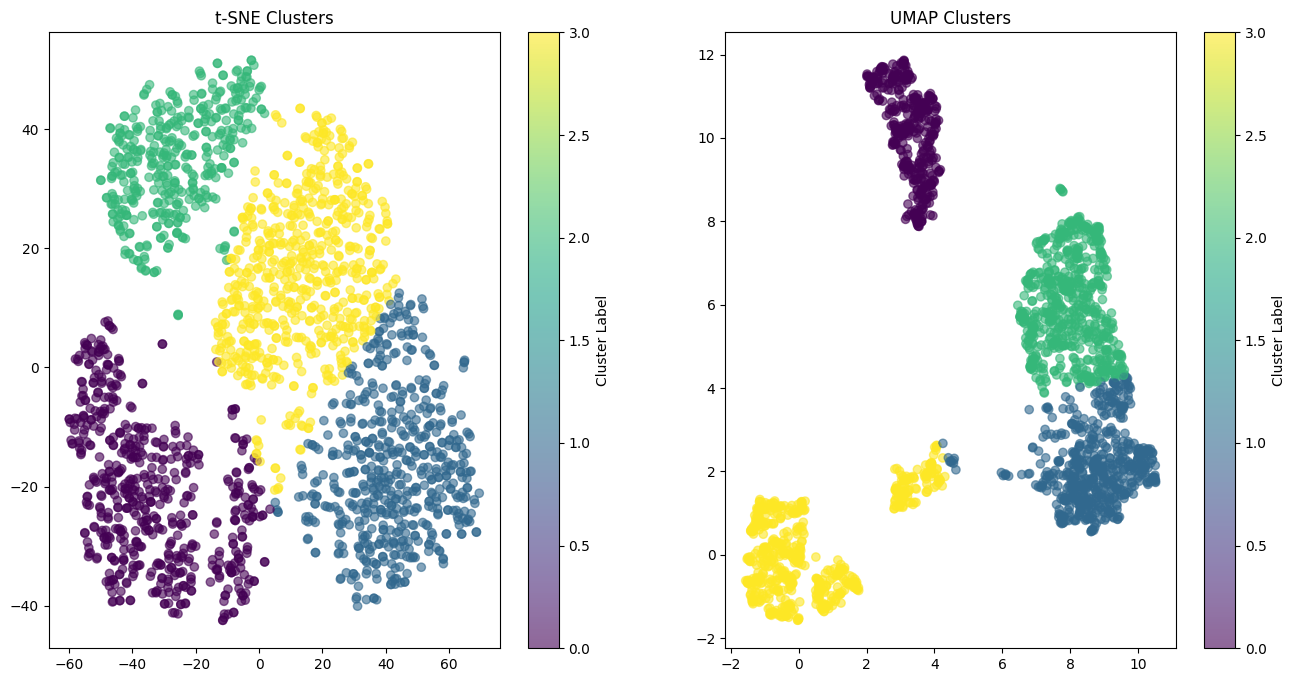

In [184]:
plt.figure(figsize=(16, 8))

# Plot t-SNE clusters
plt.subplot(121)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=tsne_labels, alpha=0.6, cmap='viridis')
plt.title('t-SNE Clusters')
plt.colorbar(label='Cluster Label')

# Plot UMAP clusters
plt.subplot(122)
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=umap_labels, alpha=0.6, cmap='viridis')
plt.title('UMAP Clusters')
plt.colorbar(label='Cluster Label')

plt.savefig('kmeans_tsne_umap_clusters.png')
plt.show()

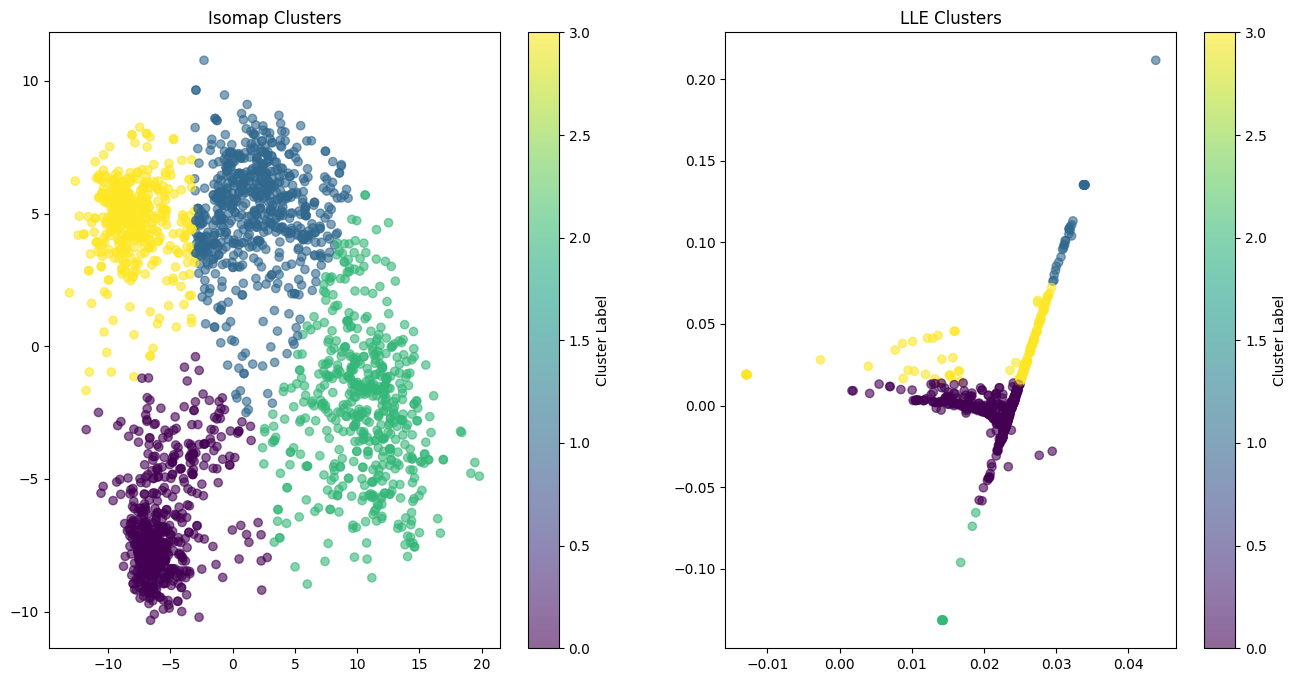

In [185]:
plt.figure(figsize=(16, 8))

# Plot t-SNE clusters
plt.subplot(121)
plt.scatter(isomap_results[:, 0], isomap_results[:, 1], c=isomap_labels, alpha=0.6, cmap='viridis')
plt.title('Isomap Clusters')
plt.colorbar(label='Cluster Label')

# Plot UMAP clusters
plt.subplot(122)
plt.scatter(lle_results[:, 0], lle_results[:, 1], c=lle_labels, alpha=0.6, cmap='viridis')
plt.title('LLE Clusters')
plt.colorbar(label='Cluster Label')

plt.savefig('kmeans_isomap_LLE_clusters.png')
plt.show()

In [186]:

labels_filtered = tsne_labels[original_indices]
labels_filtered = labels_filtered[filtered_indices]

In [187]:
data = data2
scaler=StandardScaler()
dataset_temp=data[['Income','Seniority','Spending']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')


dataset_temp['Cluster'] = labels_filtered
dataset_temp=dataset_temp.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
data = data.merge(dataset_temp.Cluster, left_index=True, right_index=True)


PLOT = go.Figure()
for C in list(data.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data.Cluster == C]['Income'],
                                y = data[data.Cluster == C]['Seniority'],
                                z = data[data.Cluster == C]['Spending'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Seniority', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spending', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [188]:
labels_filtered = umap_labels[original_indices]
labels_filtered = labels_filtered[filtered_indices]
data = data2
scaler=StandardScaler()
dataset_temp=data[['Income','Seniority','Spending']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')


dataset_temp['Cluster'] = labels_filtered
dataset_temp=dataset_temp.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
data = data.merge(dataset_temp.Cluster, left_index=True, right_index=True)


PLOT = go.Figure()
for C in list(data.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data.Cluster == C]['Income'],
                                y = data[data.Cluster == C]['Seniority'],
                                z = data[data.Cluster == C]['Spending'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Seniority', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spending', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [189]:
labels_filtered = isomap_labels[original_indices]
labels_filtered = labels_filtered[filtered_indices]
data = data2
scaler=StandardScaler()
dataset_temp=data[['Income','Seniority','Spending']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')


dataset_temp['Cluster'] = labels_filtered
dataset_temp=dataset_temp.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
data = data.merge(dataset_temp.Cluster, left_index=True, right_index=True)


PLOT = go.Figure()
for C in list(data.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data.Cluster == C]['Income'],
                                y = data[data.Cluster == C]['Seniority'],
                                z = data[data.Cluster == C]['Spending'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Seniority', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spending', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [190]:
labels_filtered = lle_labels[original_indices]
labels_filtered = labels_filtered[filtered_indices]
data = data2
scaler=StandardScaler()
dataset_temp=data[['Income','Seniority','Spending']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')


dataset_temp['Cluster'] = labels_filtered
dataset_temp=dataset_temp.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
data = data.merge(dataset_temp.Cluster, left_index=True, right_index=True)


PLOT = go.Figure()
for C in list(data.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data.Cluster == C]['Income'],
                                y = data[data.Cluster == C]['Seniority'],
                                z = data[data.Cluster == C]['Spending'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Seniority', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spending', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))